# Segmenter API Chunking

Ensure you perform text-seg-lm chunking **before** this notebook.

## Load blog posts

In [60]:
import pickle

In [61]:
pickle_filename = "docs-qwen-chunks.pkl"

In [62]:
with open (pickle_filename, "rb") as file:
    docs = pickle.load(file)

## Jina Segmenter API

In [55]:
import getpass

jina_segmenter_url = "https://segment.jina.ai/"
# JINA_TOKEN = userdata.get("JINA_TOKEN")
JINA_TOKEN = getpass.getpass()

headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {JINA_TOKEN}'
}

 ········


In [63]:
import requests

for doc in docs:
  print(f"Processing {doc.filename}")
  data = {
      "content": doc.text,
      "return_tokens": "false",
      "return_chunks": "true",
      "max_chunk_length": "1000",
  }

  response = requests.post(jina_segmenter_url, headers=headers, json=data)
  response = response.json()

  try:
      doc.chunks["jina-segmenter-api"] = response["chunks"]
  except:
      print(f"Error with {doc.filename}")

Processing reader-lm-small-language-models-for-cleaning-and-converting-html-to-markdown
Processing jina-colbert-v2-multilingual-late-interaction-retriever-for-embedding-and-reranking
Processing late-chunking-in-long-context-embedding-models
Processing the-what-and-why-of-text-image-modality-gap-in-clip-models
Processing by-hoovering-up-the-web-ai-is-poisoning-itself
Processing what-we-learned-at-icml2024-ft-plag-xrm-tinybenchmark-magiclens-prompt-sketching-etc
Processing jina-embeddings-and-reranker-on-azure-scalable-business-ready-ai-solutions
Processing having-it-both-ways-combining-bm25-with-ai-reranking
Processing smaller-faster-cheaper-jina-rerankers-turbo-and-tiny
Processing enhancing-search-results-with-jina-ais-reranker-api-in-myscale
Processing retrieve-jira-tickets-with-jina-reranker-and-haystack-20
Processing dspy-not-your-average-prompt-engineering
Processing elevating-youtube-scripts-with-promptperfect-ai-mastery-for-video-content-creators
Processing next-level-cloud-ai-ji

In [65]:
for doc in docs:
    print(doc.chunks.keys())

dict_keys(['simple_chunking', 'cot_topic_chunking', 'summary_chunking', 'jina-segmenter-api'])
dict_keys(['simple_chunking', 'cot_topic_chunking', 'summary_chunking', 'jina-segmenter-api'])
dict_keys(['simple_chunking', 'cot_topic_chunking', 'summary_chunking', 'jina-segmenter-api'])
dict_keys(['simple_chunking', 'cot_topic_chunking', 'summary_chunking', 'jina-segmenter-api'])
dict_keys(['simple_chunking', 'cot_topic_chunking', 'summary_chunking', 'jina-segmenter-api'])
dict_keys(['simple_chunking', 'cot_topic_chunking', 'summary_chunking', 'jina-segmenter-api'])
dict_keys(['simple_chunking', 'cot_topic_chunking', 'summary_chunking', 'jina-segmenter-api'])
dict_keys(['simple_chunking', 'cot_topic_chunking', 'summary_chunking', 'jina-segmenter-api'])
dict_keys(['simple_chunking', 'cot_topic_chunking', 'summary_chunking', 'jina-segmenter-api'])
dict_keys(['simple_chunking', 'cot_topic_chunking', 'summary_chunking', 'jina-segmenter-api'])
dict_keys(['simple_chunking', 'summary_chunking', 

In [66]:
import pickle

with open("docs-all-chunks", "wb") as file:
    file.write(pickle.dumps(docs))

## Stats

In [ ]:
# max chunk length == 1k
total_chunks = 0
for doc in docs:
    chunk_len = len(doc.chunks["jina-segmenter-api"])
    print({chunk_len}, "-", doc.filename)
    total_chunks += chunk_len

print(f"TOTAL: {total_chunks}")

In [69]:
import statistics
import numpy as np

def get_chunk_stats(docs: list, chunk_strategy: str):
    """
    Get stats for all chunks in a list of docs
    - chunk_strategy: e.g. jina-segmenter-api or text-seg-lm
    """
    output = {}
    all_chunks = []
    for doc in docs:
        all_chunks.extend(doc.chunks[chunk_strategy])

    lengths = [len(chunk) for chunk in all_chunks]

    output["total_chunks"] = len(all_chunks)
    output['max_length'] = max(lengths)
    output['min_length'] = min(lengths)
    output['mean_length'] = round(sum(lengths) / len(lengths))
    output['median_length'] = round(statistics.median(lengths))
    
    # Calculate percentiles
    output['25th_percentile'] = round(np.percentile(lengths, 25))
    output['50th_percentile'] = round(np.percentile(lengths, 50))  # Same as the median
    output['75th_percentile'] = round(np.percentile(lengths, 75))

    return output

In [70]:
stats = get_chunk_stats(docs, "jina-segmenter-api")

In [71]:
stats

{'total_chunks': 7801,
 'max_length': 2420,
 'min_length': 2,
 'mean_length': 82,
 'median_length': 30,
 '25th_percentile': 11,
 '50th_percentile': 30,
 '75th_percentile': 84}

In [72]:
all_chunks = []
for doc in docs:
    all_chunks.extend(doc.chunks["jina-segmenter-api"])

In [38]:
!pip install -q matplotlib

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def plot_chunk_length_distribution(all_chunks):
    # Calculate the length of each chunk
    lengths = [len(chunk) for chunk in all_chunks]
    
    # Calculate percentiles
    p25 = np.percentile(lengths, 25)
    p50 = np.percentile(lengths, 50)  # This is the median
    p75 = np.percentile(lengths, 75)
    
    # Create a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=50, edgecolor='black')  # Adjust the number of bins as needed
    
    # Add vertical lines for percentiles
    plt.axvline(p25, color='green', linestyle='dashed', linewidth=1.5, label='25th Percentile')
    plt.axvline(p50, color='blue', linestyle='dashed', linewidth=1.5, label='50th Percentile (Median)')
    plt.axvline(p75, color='red', linestyle='dashed', linewidth=1.5, label='75th Percentile')
    
    # Add titles and labels
    plt.title('Chunk Length Distribution')
    plt.xlabel('Chunk Length')
    plt.ylabel('Number of Chunks')
    
    # Add legend to show percentile lines
    plt.legend()
    
    # Show the plot
    plt.show()

# Example usage with a list of chunks
# all_chunks = ['This is a test', 'Another chunk of text', 'Just a single word', 'This one has five words in it']


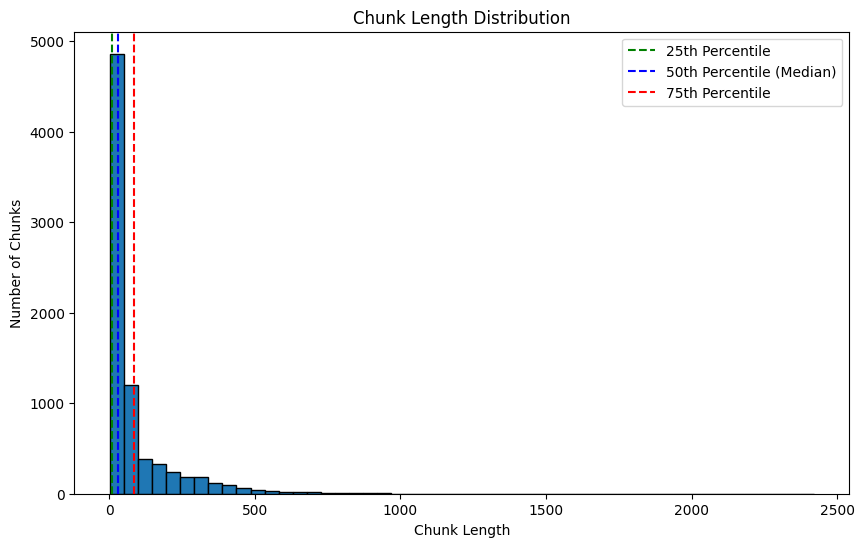

In [74]:
plot_chunk_length_distribution(all_chunks)

In [75]:
import matplotlib.pyplot as plt
import numpy as np

def plot_chunk_word_count_distribution(all_chunks):
    # Calculate the number of words in each chunk
    word_counts = [len(chunk.split(" ")) for chunk in all_chunks]
    
    # Calculate percentiles
    p25 = np.percentile(word_counts, 25)
    p50 = np.percentile(word_counts, 50)  # This is the median
    p75 = np.percentile(word_counts, 75)
    
    # Create a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=50, edgecolor='black')  # Adjust bins as needed
    
    # Add vertical lines for percentiles
    plt.axvline(p25, color='green', linestyle='dashed', linewidth=1.5, label='25th Percentile')
    plt.axvline(p50, color='blue', linestyle='dashed', linewidth=1.5, label='50th Percentile (Median)')
    plt.axvline(p75, color='red', linestyle='dashed', linewidth=1.5, label='75th Percentile')
    
    # Add titles and labels
    plt.title('Chunk Word Count Distribution')
    plt.xlabel('Number of Words in Chunk')
    plt.ylabel('Number of Chunks')
    
    # Add legend to show percentile lines
    plt.legend()
    
    # Show the plot
    plt.show()

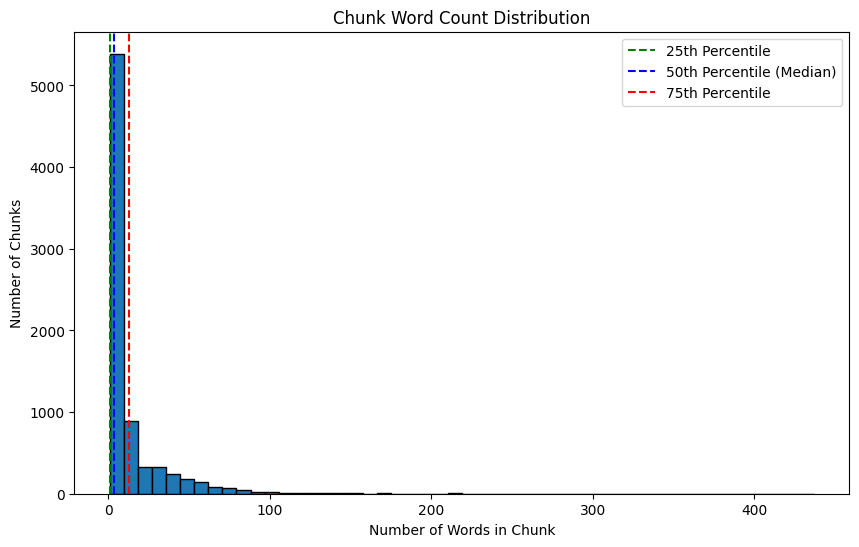

In [76]:
plot_chunk_word_count_distribution(all_chunks)

## Stats

In [ ]:
# max chunk length == 1k
total_chunks = 0
for doc in docs:
    chunk_len = len(doc.chunks["jina-segmenter-api"])
    print({chunk_len}, "-", doc.filename)
    total_chunks += chunk_len

print(f"TOTAL: {total_chunks}")

In [69]:
import statistics
import numpy as np

def get_chunk_stats(docs: list, chunk_strategy: str):
    """
    Get stats for all chunks in a list of docs
    - chunk_strategy: e.g. jina-segmenter-api or text-seg-lm
    """
    output = {}
    all_chunks = []
    for doc in docs:
        all_chunks.extend(doc.chunks[chunk_strategy])

    lengths = [len(chunk) for chunk in all_chunks]

    output["total_chunks"] = len(all_chunks)
    output['max_length'] = max(lengths)
    output['min_length'] = min(lengths)
    output['mean_length'] = round(sum(lengths) / len(lengths))
    output['median_length'] = round(statistics.median(lengths))
    
    # Calculate percentiles
    output['25th_percentile'] = round(np.percentile(lengths, 25))
    output['50th_percentile'] = round(np.percentile(lengths, 50))  # Same as the median
    output['75th_percentile'] = round(np.percentile(lengths, 75))

    return output

In [70]:
stats = get_chunk_stats(docs, "jina-segmenter-api")

In [71]:
stats

{'total_chunks': 7801,
 'max_length': 2420,
 'min_length': 2,
 'mean_length': 82,
 'median_length': 30,
 '25th_percentile': 11,
 '50th_percentile': 30,
 '75th_percentile': 84}

In [72]:
all_chunks = []
for doc in docs:
    all_chunks.extend(doc.chunks["jina-segmenter-api"])

In [38]:
!pip install -q matplotlib

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def plot_chunk_length_distribution(all_chunks):
    # Calculate the length of each chunk
    lengths = [len(chunk) for chunk in all_chunks]
    
    # Calculate percentiles
    p25 = np.percentile(lengths, 25)
    p50 = np.percentile(lengths, 50)  # This is the median
    p75 = np.percentile(lengths, 75)
    
    # Create a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=50, edgecolor='black')  # Adjust the number of bins as needed
    
    # Add vertical lines for percentiles
    plt.axvline(p25, color='green', linestyle='dashed', linewidth=1.5, label='25th Percentile')
    plt.axvline(p50, color='blue', linestyle='dashed', linewidth=1.5, label='50th Percentile (Median)')
    plt.axvline(p75, color='red', linestyle='dashed', linewidth=1.5, label='75th Percentile')
    
    # Add titles and labels
    plt.title('Chunk Length Distribution')
    plt.xlabel('Chunk Length')
    plt.ylabel('Number of Chunks')
    
    # Add legend to show percentile lines
    plt.legend()
    
    # Show the plot
    plt.show()

# Example usage with a list of chunks
# all_chunks = ['This is a test', 'Another chunk of text', 'Just a single word', 'This one has five words in it']


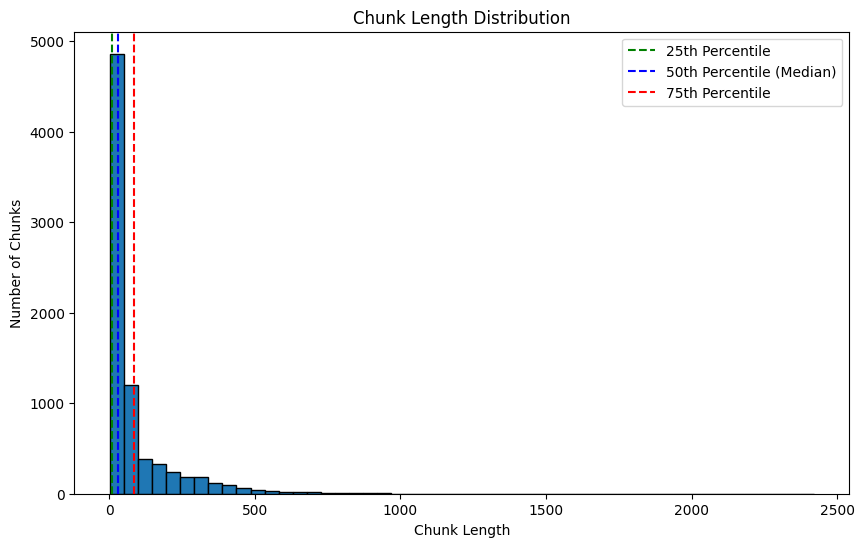

In [74]:
plot_chunk_length_distribution(all_chunks)

In [75]:
import matplotlib.pyplot as plt
import numpy as np

def plot_chunk_word_count_distribution(all_chunks):
    # Calculate the number of words in each chunk
    word_counts = [len(chunk.split(" ")) for chunk in all_chunks]
    
    # Calculate percentiles
    p25 = np.percentile(word_counts, 25)
    p50 = np.percentile(word_counts, 50)  # This is the median
    p75 = np.percentile(word_counts, 75)
    
    # Create a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=50, edgecolor='black')  # Adjust bins as needed
    
    # Add vertical lines for percentiles
    plt.axvline(p25, color='green', linestyle='dashed', linewidth=1.5, label='25th Percentile')
    plt.axvline(p50, color='blue', linestyle='dashed', linewidth=1.5, label='50th Percentile (Median)')
    plt.axvline(p75, color='red', linestyle='dashed', linewidth=1.5, label='75th Percentile')
    
    # Add titles and labels
    plt.title('Chunk Word Count Distribution')
    plt.xlabel('Number of Words in Chunk')
    plt.ylabel('Number of Chunks')
    
    # Add legend to show percentile lines
    plt.legend()
    
    # Show the plot
    plt.show()

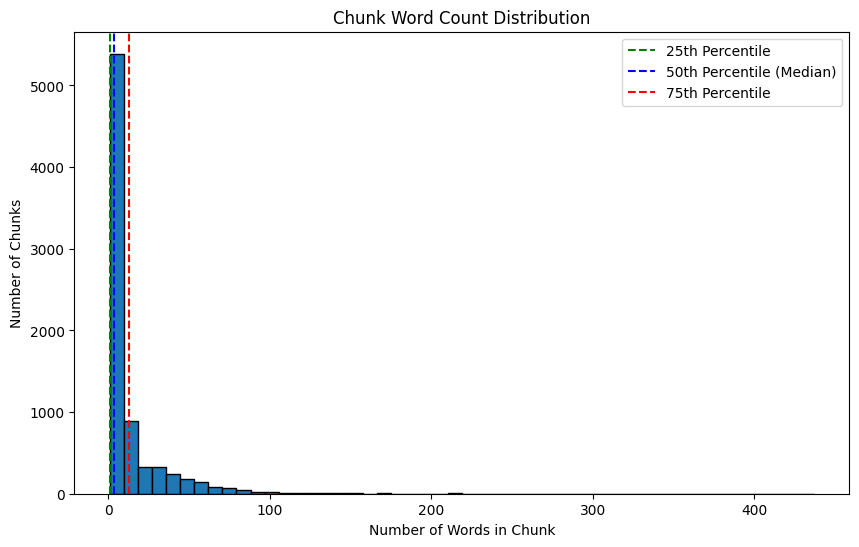

In [76]:
plot_chunk_word_count_distribution(all_chunks)